# Промышленность оптимизация расходов

# Введение: 
Чтобы оптимизировать производственные расходы, необходимо построить модель, которая предскажет температуру стали и позвлит металлургическому комбинату ООО «Так закаляем сталь» р уменьшить потребление электроэнергии на этапе ее обработки. 

# Цель проекта: 
В срок до 1 июля 2023 года изучить предоставленные заказчиком данные, на которых построить модель со значением МАЕ неменее 6.8 для предсказания температуры металла, поступающего в машину непрерывной разливки. По результатам выполненой работы подготовить отчет.

In [1]:
! pip install missingno
 
import missingno as msno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Изучим предоставленные данные

In [3]:
data_arc = pd.read_csv("/data_arc_new.csv")
data_bulk = pd.read_csv("/data_bulk_new.csv")
data_bulk_time = pd.read_csv("/data_bulk_time_new.csv")
data_gas = pd.read_csv("/data_gas_new.csv")
data_temp = pd.read_csv("/data_temp_new.csv")
data_wire = pd.read_csv("/data_wire_new.csv")
data_wire_time = pd.read_csv("/data_wire_time_new.csv")

Данные содержатся в семи датасетах (csv-файлах)

Таблицы имеют разное число объектов и ризнаков. Ключевым признаком для всех датафреймов является "key" содержащий информацию о номере партии, при этом в таблицах 'data_arc' и 'data_temp' значения этих признаков повторяются. При изучении минимальных и максимальных значениях установлены нехарактерные значения признака  "Реактивная мощность" (присутствует отрицательное значение) в dateframe 'data_arc'. Таблицы 'data_bulk', 'data_bulk_time', 'data_wire', 'data_wire_time' и 'data_temp' имеют пропуски.

In [ ]:
for d in ['data_arc', 'data_bulk', 'data_bulk_time', 'data_gas', 'data_temp', 'data_wire', 'data_wire_time']:
    print(d)
    vars()[d].hist(figsize=(15, 20))
    plt.show()
    print( )
    print(d)
    display(vars()[d].describe())
    print( )
    print(d)
    display(vars()[d].info())
    print( )
    print(d)
    display(vars()[d].head())
    print( )


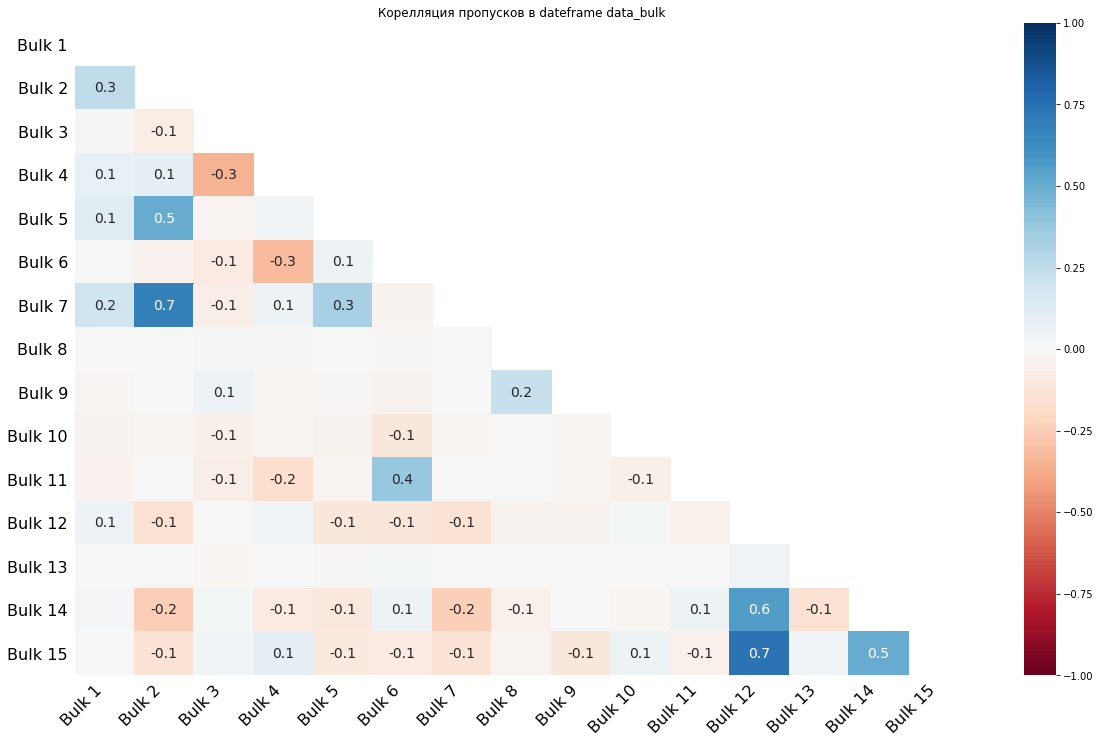

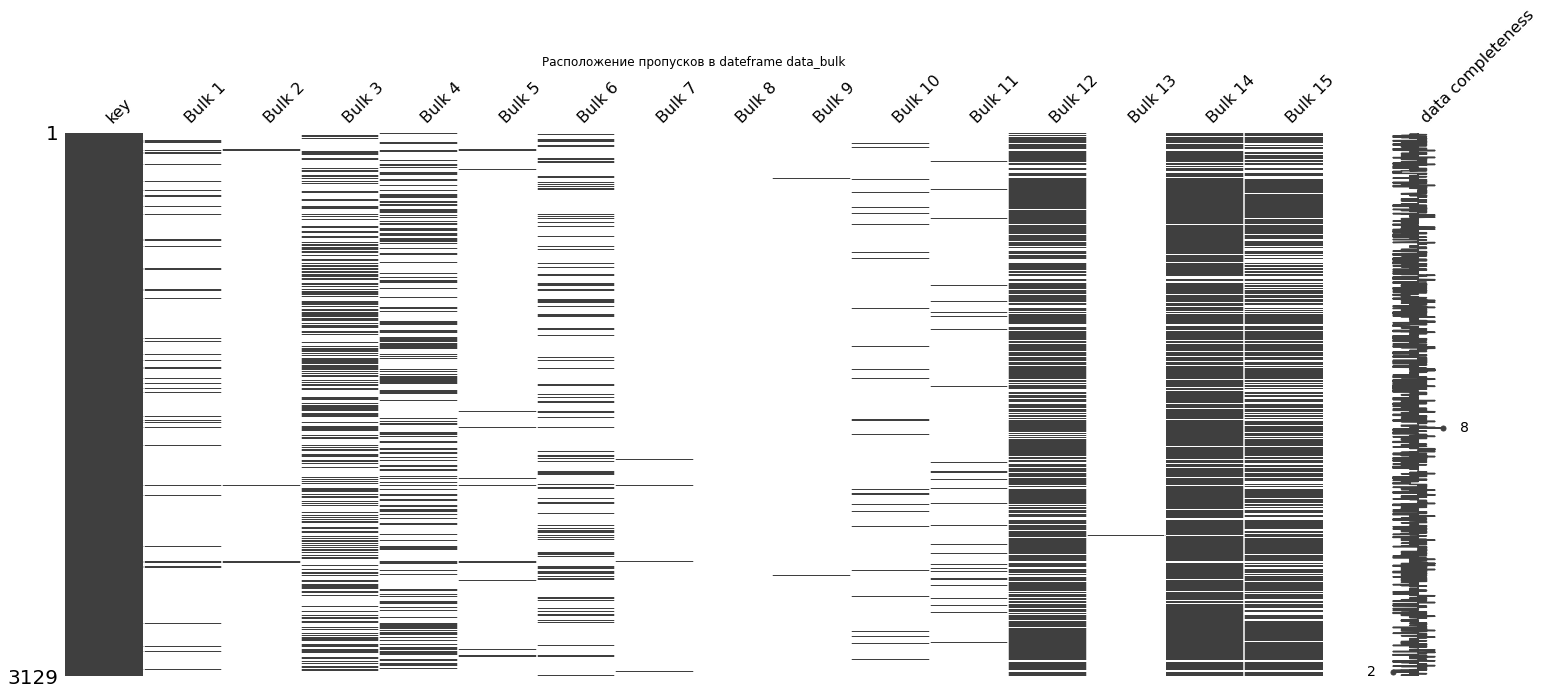

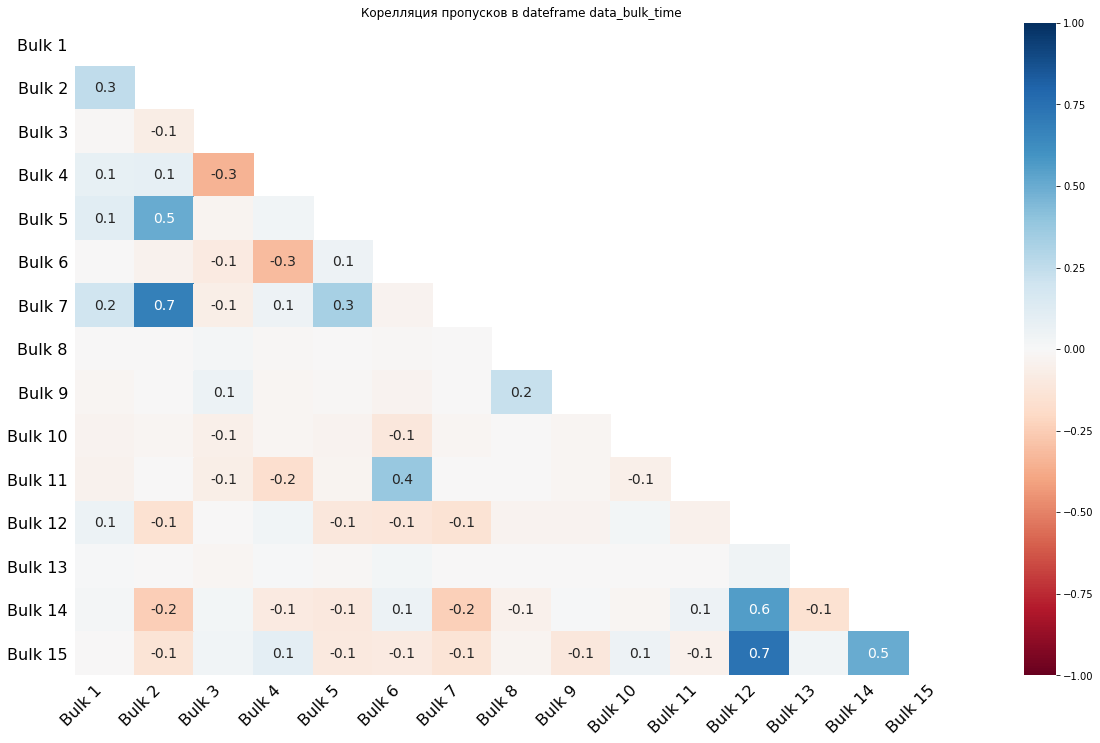

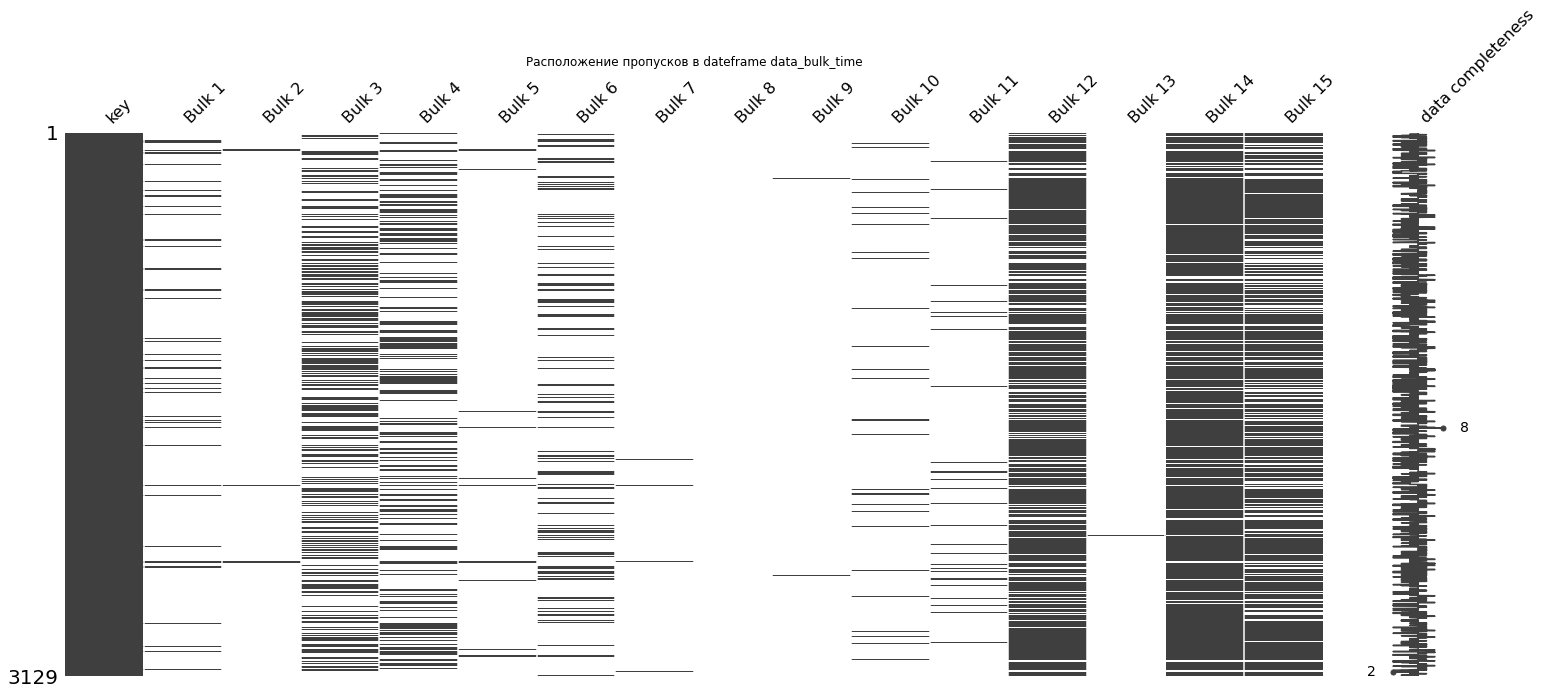

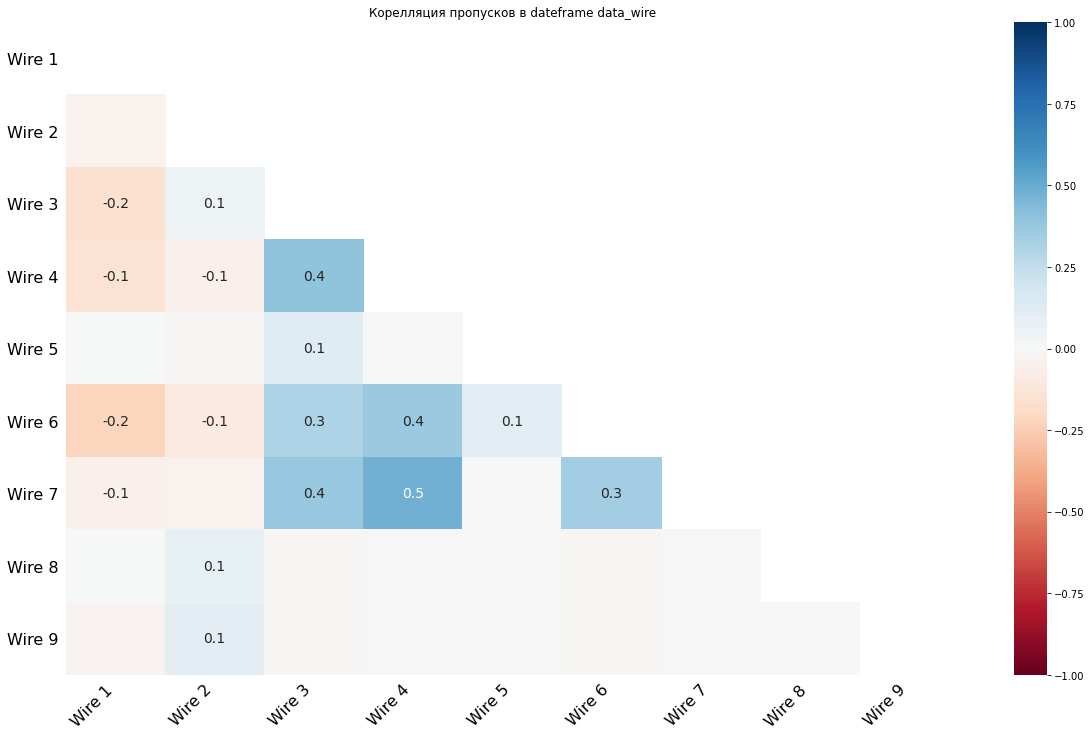

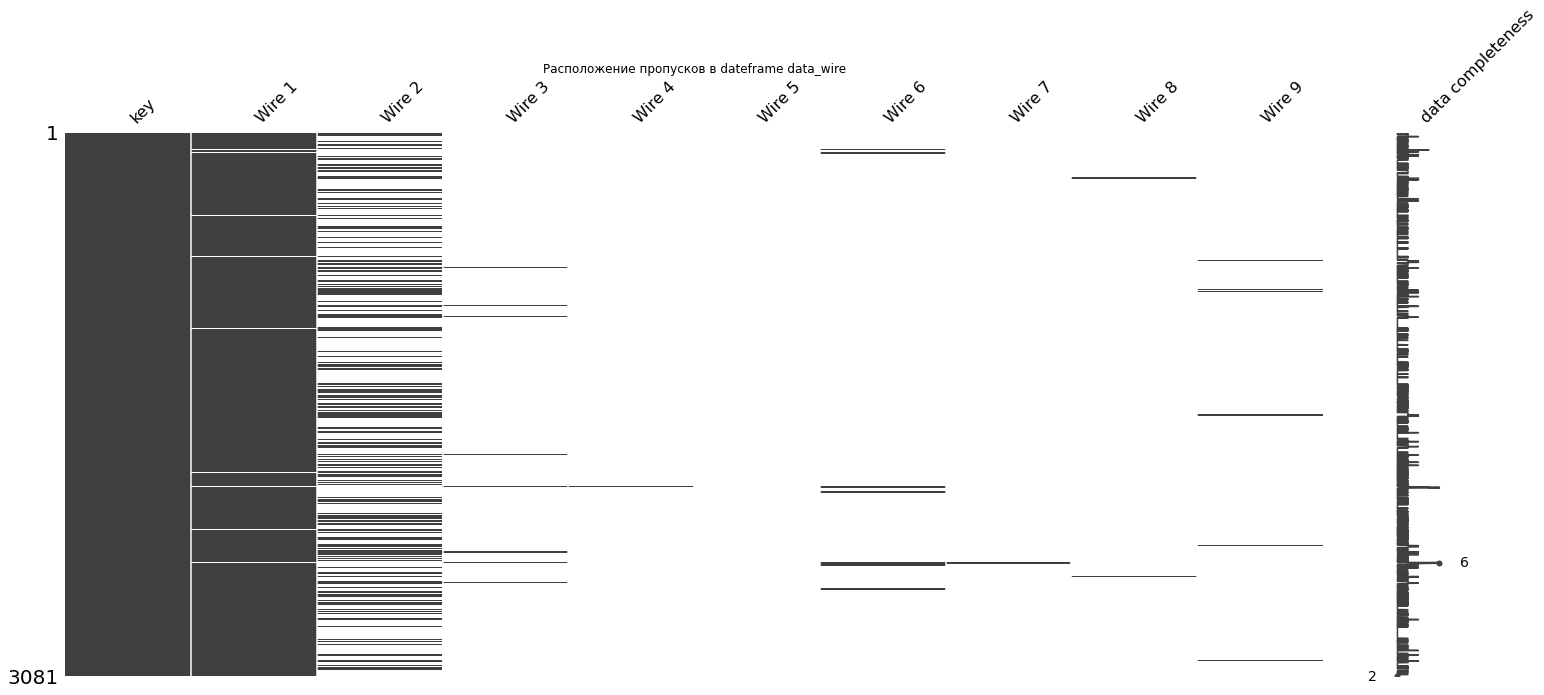

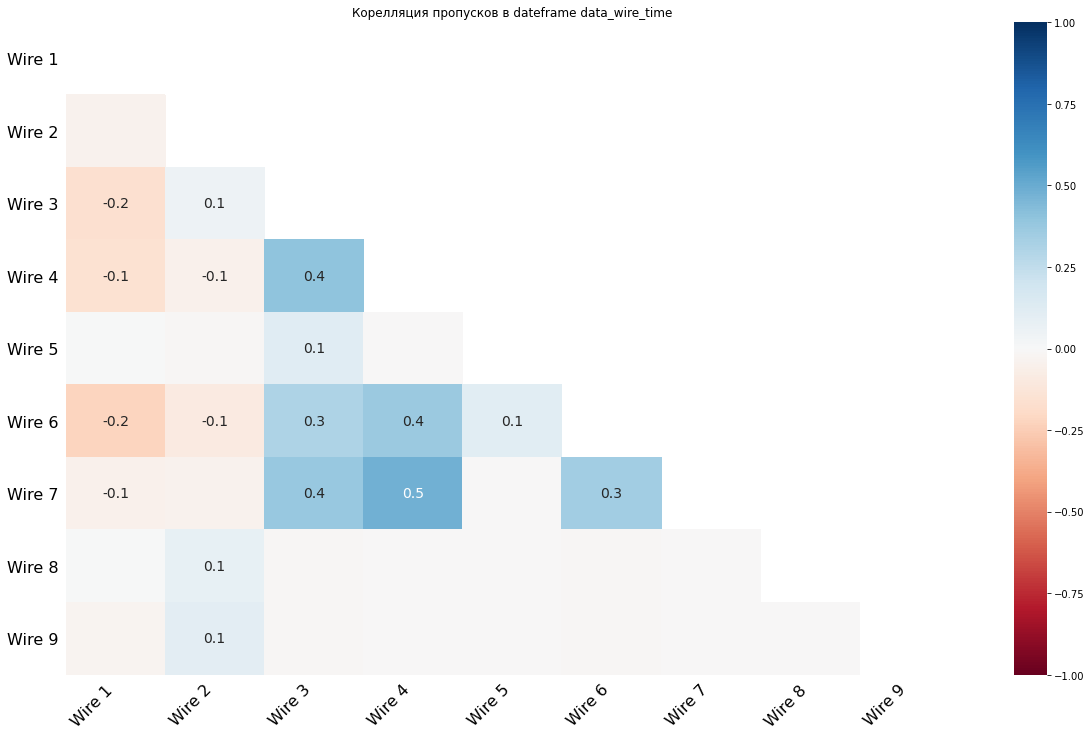

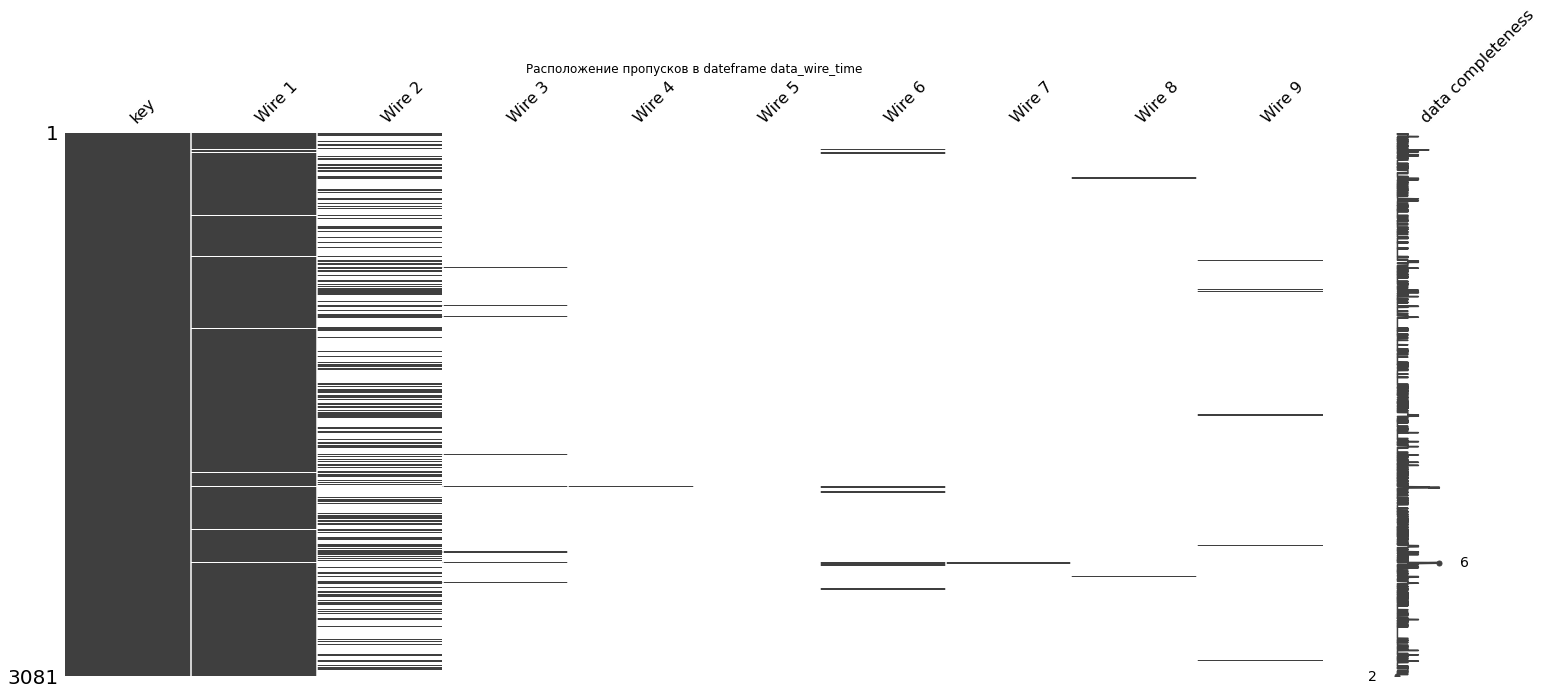

In [5]:
for d in ['data_bulk', 'data_bulk_time', 'data_wire', 'data_wire_time']:
    msno.heatmap(vars()[d])
    plt.title(f"Корелляция пропусков в dateframe {d}")
    plt.show()

    msno.matrix(vars()[d], labels = True)
    plt.title(f"Расположение пропусков в dateframe {d}")
    plt.show()

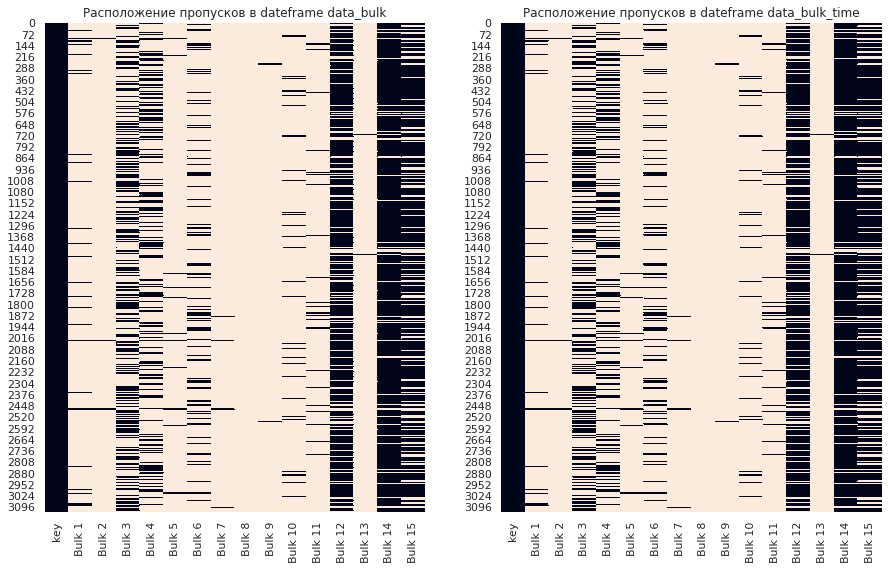

In [6]:
sns.set(rc={'figure.figsize':(15,9)})

plt.subplot(1, 2, 1)
sns.heatmap(data_bulk.isnull(), cbar = False)
plt.title("Расположение пропусков в dateframe data_bulk")

plt.subplot(1, 2, 2)
sns.heatmap(data_bulk_time.isnull(), cbar = False)
plt.title("Расположение пропусков в dateframe data_bulk_time")

plt.show()

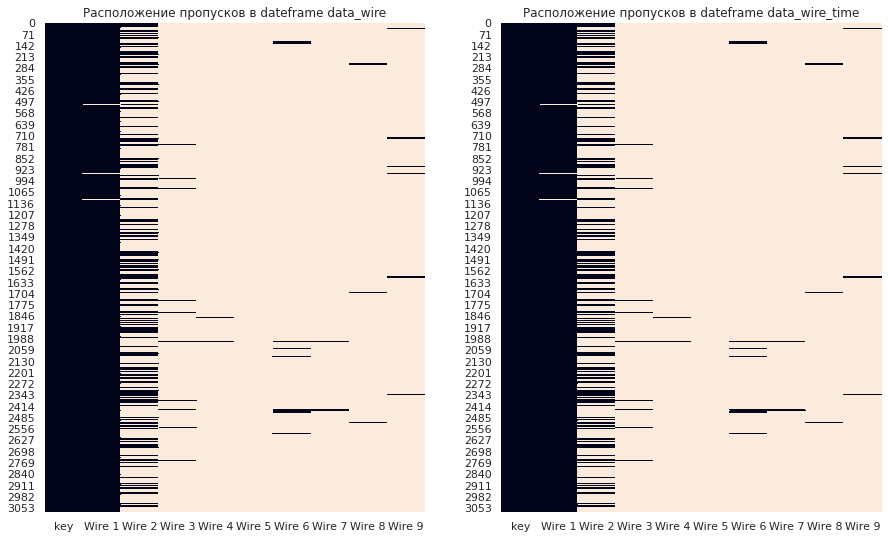

In [7]:
sns.set(rc={'figure.figsize':(15,9)})

plt.subplot(1, 2, 1)
sns.heatmap(data_wire.isnull(), cbar = False)
plt.title("Расположение пропусков в dateframe data_wire")

plt.subplot(1, 2, 2)
sns.heatmap(data_wire_time.isnull(), cbar = False)
plt.title("Расположение пропусков в dateframe data_wire_time")

plt.show()

Как можно увидеть в таблицах 'data_bulk' и 'data_bulk_time' пропуски в признаках, описывающих сыпучие материалы, могут коррелировать между собой, пропуски в таблице 'data_bulk' соответствуют пропускам в 'data_bulk_time', а в'data_wire' - 'data_wire_time'.

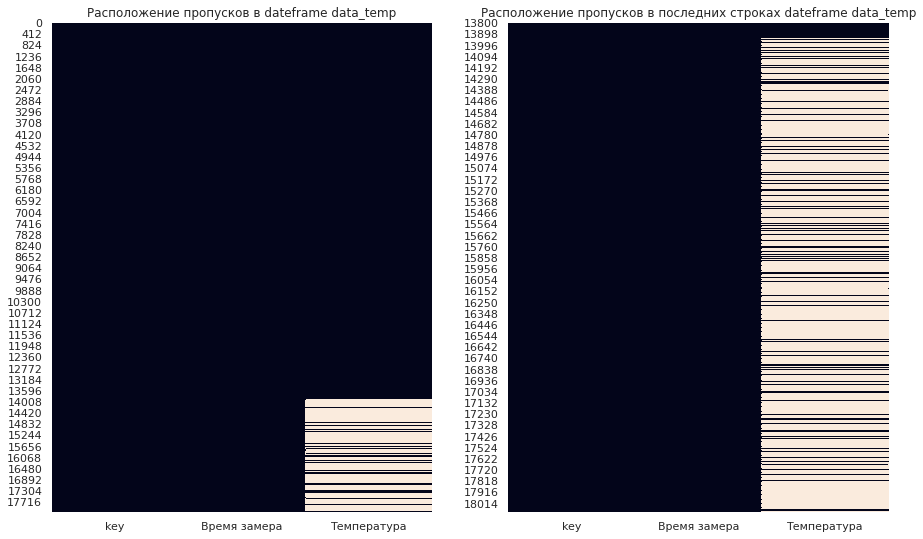

In [8]:
sns.set(rc={'figure.figsize':(15,9)})

plt.subplot(1, 2, 1)
sns.heatmap(data_temp.isnull(), cbar = False)
plt.title("Расположение пропусков в dateframe data_temp")

plt.subplot(1, 2, 2)
sns.heatmap(data_temp.loc[13800:].isnull(), cbar = False)
plt.title("Расположение пропусков в последних строках dateframe data_temp")

plt.show()


In [ ]:
data_temp.tail(20)

In [10]:
key_isnull=list(data_temp[data_temp['Температура'].isnull()]['key'].unique())
data_temp.query('key in @key_isnull').pivot_table(index='key', values='Температура', aggfunc='mean').isna().sum()

Температура    0
dtype: int64

In [11]:
print(f' Номер первой партии с пропусками в  результатах измерения температуры {key_isnull[0]}')

 Номер первой партии с пропусками в  результатах измерения температуры 2500


В dateframe 'data_temp' имеются пропуски в  результатах измерения температуры начиная с партии № 2500, при этом первые измерения в каждой партии присутствуют.

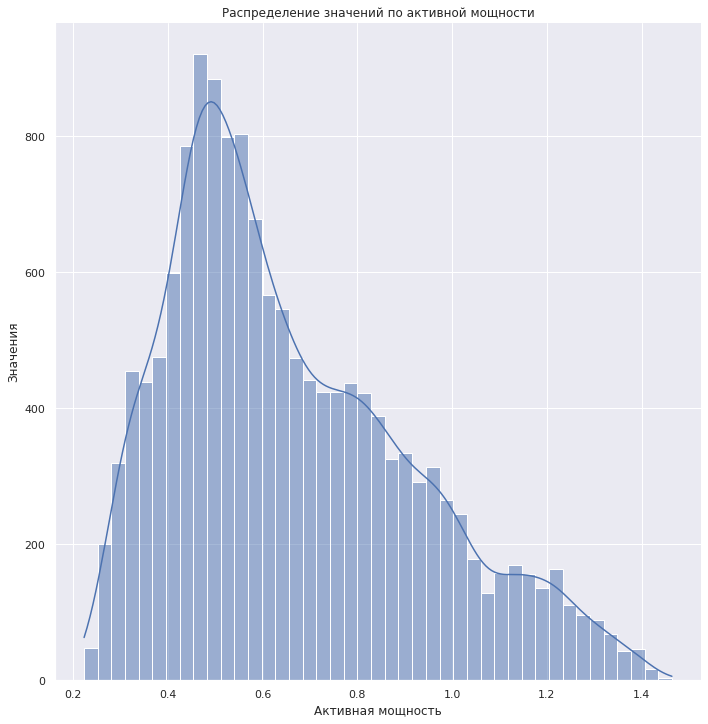

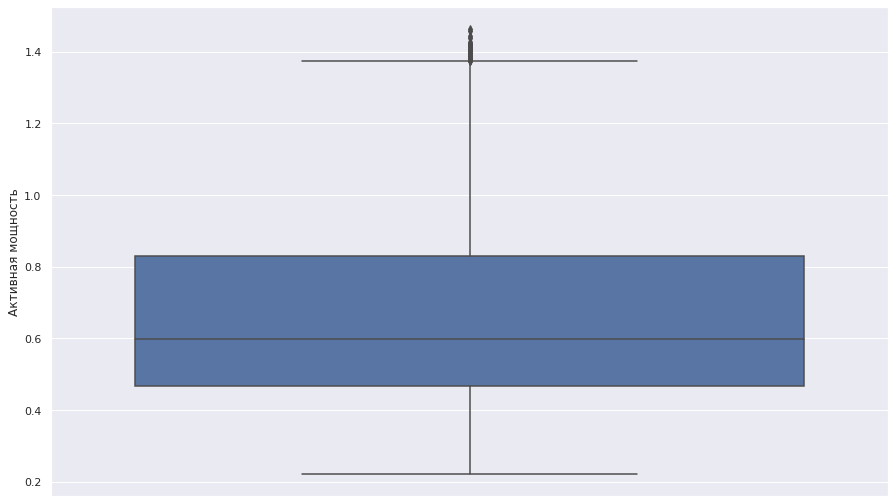

In [12]:
sns.displot(data_arc['Активная мощность'], kde=True, height=10)
plt.ylabel('Значения')
plt.xlabel('Активная мощность')
plt.title("Распределение значений по активной мощности")
plt.show()

sns.boxplot(data=data_arc, y='Активная мощность')
plt.ylabel('Активная мощность')
plt.show()

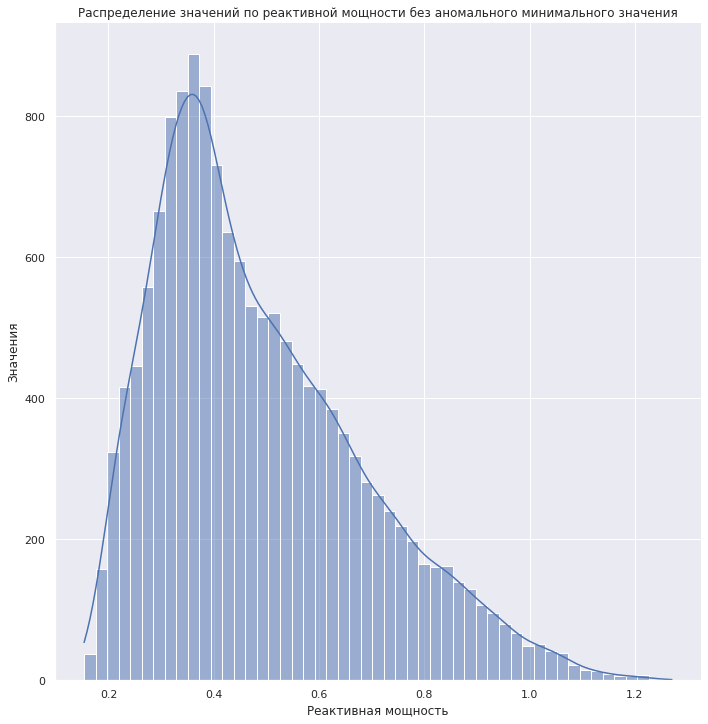

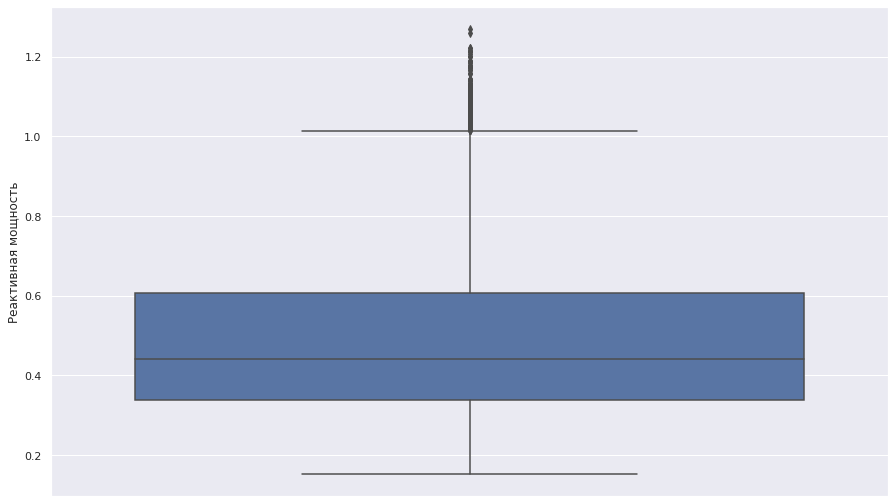

In [13]:
min_power = data_arc['Реактивная мощность'].min()

sns.displot(data_arc.loc[data_arc['Реактивная мощность'] > data_arc['Реактивная мощность'].min()]['Реактивная мощность'], kde=True, height=10)
plt.ylabel('Значения')
plt.xlabel('Реактивная мощность')
plt.title("Распределение значений по реактивной мощности без аномального минимального значения")
plt.show()

sns.boxplot(data=data_arc.loc[data_arc['Реактивная мощность'] > data_arc['Реактивная мощность'].min()], y='Реактивная мощность')
plt.ylabel('Реактивная мощность')
plt.show()

Как видно на графиках в data_arc в параметрах Реактивная мощность и Активная мощность имеются небольшие выбросы, при этом минимальное значение Реактивной мощности явно аномальное.

In [ ]:
da_only_time = data_arc.drop(['key', 'Активная мощность', 'Реактивная мощность'], axis = 1)
da_only_time['Начало нагрева дугой']= pd.to_datetime(da_only_time['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
da_only_time['Конец нагрева дугой']= pd.to_datetime(da_only_time['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
da_only_time['Продолжительность нагрева дугой']= (da_only_time['Конец нагрева дугой'] - da_only_time['Начало нагрева дугой']).dt.seconds

display(da_only_time.describe(datetime_is_numeric=True))
print( )

sns.displot(da_only_time['Продолжительность нагрева дугой'], kde=True, height=10)
plt.ylabel('Значения')
plt.xlabel('Продолжительность нагрева дугой в секундах')
plt.title("Распределение значений по продолжительности нагрева дугой")
plt.show()

sns.boxplot(data=da_only_time, y='Продолжительность нагрева дугой')
plt.ylabel('Продолжительность нагрева дугой в секундах')
plt.show()

Как мы видим в dataframe data_arc имеются выбросы по длительности нагрева дуги.

In [ ]:
for d in ['data_bulk_time', 'data_wire_time']:
    data = vars()[d].drop(['key'], axis = 1)
    for c in data.columns:
        data[c]= pd.to_datetime(data[c], format='%Y-%m-%d %H:%M:%S')
    print(d)
    display(data.describe(datetime_is_numeric=True))
    
        

В таблицах 'data_bulk_time', 'data_wire_time' аномалий не обнаружено.

<h2> Вывод <a class="tocSkip"> </h2>  
    Данные находятся в 7 таблицах с общим признаком "key", указывающим на номер партии, представляют из себя сведения о процессе обработки стали, собраные за период с июня по сентябрь 2019 года. В таблицах 'data_arc' и 'data_temp' значения признка key повторяются.  Таблицы 'data_bulk', 'data_bulk_time', 'data_wire', 'data_wire_time' и 'data_temp' имеют пропуски. Пропуски в таблице 'data_bulk' соответствуют пропускам в 'data_bulk_time', а в'data_wire' - 'data_wire_time'. В dateframe 'data_temp' имеются пропуски в  результатах измерения температуры начиная с партии № 2500. Как видно на графиках в data_arc в параметрах Реактивная мощность и Активная мощность имеются небольшие выбросы, при этом минимальное значение Реактивной мощности аномально, также имеются выбросы по длительности нагрева дуги.

<h2> План работы <a class="tocSkip"> </h2>
    
   
1. Осуществить агрегирование В таблице'data_arc' по параметру "key".
1. Осуществить склейку данных из 5 таблиц ('data_bulk_time', 'data_wire_time' содержат только временные данные и не пригодятся нам при построении моделей) в две таблицы: с целевым признаком- последней по времени темпрературой по каждой партии из таблицы 'data_temp'
1. Предобработка данных (удаление пропусков и аномальных значений, принятие решения по выбросам) и изучение распределений признаков
1. Обучение модели, подбор гипперпараметров и выбор лучшей модели
1. Проверка лучшей модели на тестовой выборке и на "вменяемость", изучение выжности признаков
1. Итоговый вывод

<h2> Вопросы <a class="tocSkip"> </h2>
    
    
 1. Что можно рассмотреть как выбросы в data_arc в параметрах Реактивная мощность и Активная мощность, а также при расчете длительности нагрева дуги?
 2. Чем вызваны пропуски  в  результатах измерения температуры в dateframe 'data_temp'?
 2. Есть ли требования к способу слияния таблиц?

## Осуществим подготовку данных

Данные возьмем из следующих таблиц:

data_arc
data_bulk
data_gas
data_temp
data_wire

Агрегируем значения в data_arc

In [ ]:
data_arc['Начало нагрева дугой']= pd.to_datetime(data_arc['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
data_arc['Конец нагрева дугой']= pd.to_datetime(data_arc['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
for_drop = data_arc.loc[data_arc['Реактивная мощность'] == data_arc['Реактивная мощность'].min()]['key']
data_arc['Продолжительность нагрева дугой']= (data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']).dt.seconds
pt_arc = data_arc.pivot_table(index='key', values = ['Активная мощность', 'Реактивная мощность', 'Продолжительность нагрева дугой'], aggfunc = 'sum')
pt_arc['Число итераций'] = data_arc.groupby(['key']).count()['Начало нагрева дугой']
pt_arc = pt_arc[pt_arc.index != int(for_drop.values)]
pt_arc.head()

В data_bulk и в data_temp data_wire избавимся от пропусков

In [ ]:
data_bulk = data_bulk.fillna(0)
data_wire = data_wire.fillna(0)
display(data_bulk.head())
display(data_bulk.describe())
display(data_wire.head())
data_wire.describe()

In [18]:
for n in range(1,10):
    print(f" Число не нулевых значений в Wire {n} = {data_wire.loc[data_wire['Wire '+ str(n)] != 0]['Wire '+ str(n)].count()}")

 Число не нулевых значений в Wire 1 = 3055
 Число не нулевых значений в Wire 2 = 1079
 Число не нулевых значений в Wire 3 = 63
 Число не нулевых значений в Wire 4 = 14
 Число не нулевых значений в Wire 5 = 1
 Число не нулевых значений в Wire 6 = 73
 Число не нулевых значений в Wire 7 = 11
 Число не нулевых значений в Wire 8 = 19
 Число не нулевых значений в Wire 9 = 29


In [19]:
for n in range(1,16):
    print(f" Число не нулевых значений в Bulk {n} = {data_bulk.loc[data_bulk['Bulk '+ str(n)] != 0]['Bulk '+ str(n)].count()}")

 Число не нулевых значений в Bulk 1 = 252
 Число не нулевых значений в Bulk 2 = 22
 Число не нулевых значений в Bulk 3 = 1298
 Число не нулевых значений в Bulk 4 = 1014
 Число не нулевых значений в Bulk 5 = 77
 Число не нулевых значений в Bulk 6 = 576
 Число не нулевых значений в Bulk 7 = 25
 Число не нулевых значений в Bulk 8 = 1
 Число не нулевых значений в Bulk 9 = 19
 Число не нулевых значений в Bulk 10 = 176
 Число не нулевых значений в Bulk 11 = 177
 Число не нулевых значений в Bulk 12 = 2450
 Число не нулевых значений в Bulk 13 = 18
 Число не нулевых значений в Bulk 14 = 2806
 Число не нулевых значений в Bulk 15 = 2248


Как мы видим в data_bulk и в data_temp имежются столбцы с единственным не нулевым значением, удалим их

In [20]:
data_wire = data_wire.drop('Wire 5', axis = 1)
data_bulk = data_bulk.drop('Bulk 8', axis = 1)

In [ ]:
data_gas.head()

В ходе процесса обработки металла, измеряемая температура не может быть ниже 1500 градусов, избавимся от партий с более низкими значениями. Кроме того начиная с 2500 партии имеются прупуски - эти партии мы тоже удалим

In [ ]:
MIN_TEMP = 1500
data_temp = data_temp.query('key < @key_isnull[0] and Температура > @MIN_TEMP')
data_temp['Время замера']= pd.to_datetime(data_temp['Время замера'], format='%Y-%m-%d %H:%M:%S')
print('Минимальная температура = ', data_temp['Температура'].min())
data_temp.tail()

In [23]:
data_temp['Время замера'].count() == data_temp['Время замера'].nunique()

True

Как мы видим все значения Времени замера в data_temp уникальны и не повторяются. Выделим температуру первого и последнего замера, а так же расчитаем время между ними. 

In [ ]:
pv_temp = data_temp.pivot_table(index='key', values = 'Время замера', aggfunc = ['min', 'max'])
pv_temp.columns = ['Время первого замера', 'Время последнего замера']
pv_temp['Температура первого замера'] = list(data_temp.loc[data_temp['Время замера'].isin(
    list(pv_temp['Время первого замера']))]['Температура'])
pv_temp['Температура последнего замера'] = list(data_temp.loc[data_temp['Время замера'].isin(
    list(pv_temp['Время последнего замера']))]['Температура'])
pv_temp['Время между замерами']= (
    pv_temp['Время последнего замера'] - pv_temp['Время первого замера']).dt.seconds
pv_temp = pv_temp.drop(['Время первого замера', 'Время последнего замера'], axis = 1)
pv_temp

In [25]:
for df in [data_bulk, data_gas, data_wire]:
    df.index = df.key
    df = df.drop('key', axis = 1)

Объединим таблицы и расмотрим получившуюся таблицу

In [ ]:
df = pd.concat([pt_arc, data_bulk, data_gas, data_wire, pv_temp], join='inner', ignore_index= False, axis=1)
df = df.drop('key', axis = 1)
df['Работа'] =  df['Активная мощность'] * df['Продолжительность нагрева дугой']
df['Полная мощность'] = np.sqrt(df['Активная мощность']**2 + df['Реактивная мощность']**2)
display(df.tail())
display(df.info())
df.describe()


Активная мощность



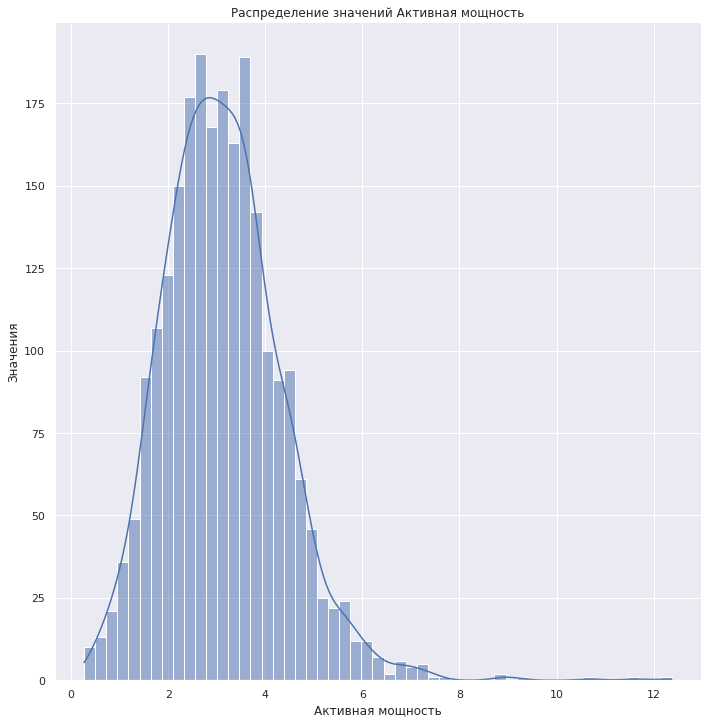

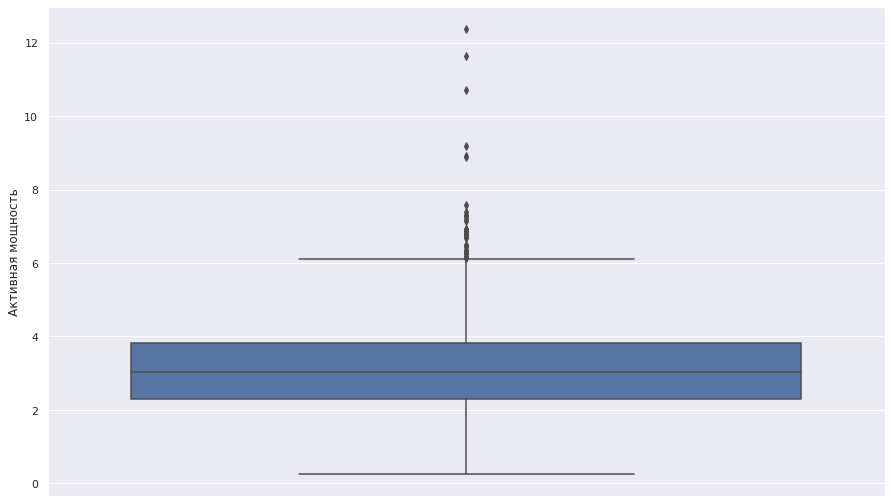


Продолжительность нагрева дугой



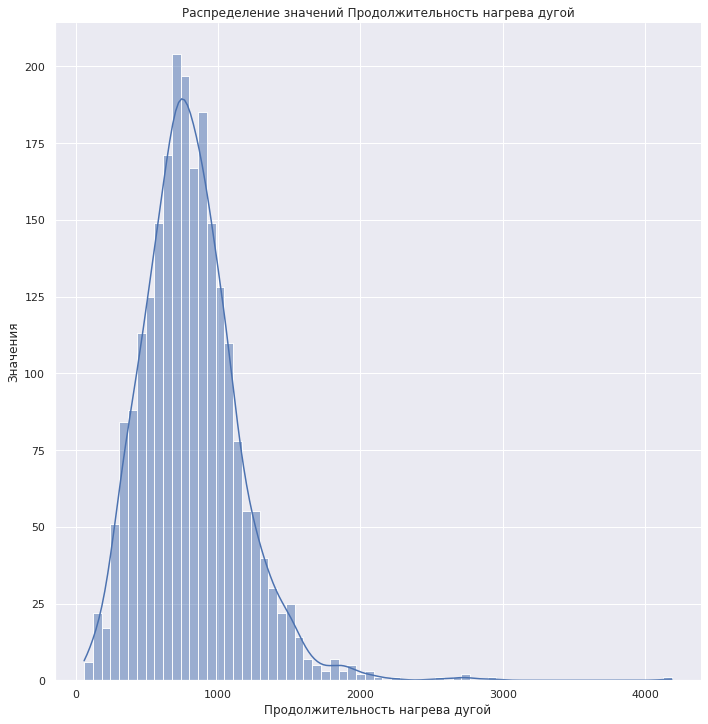

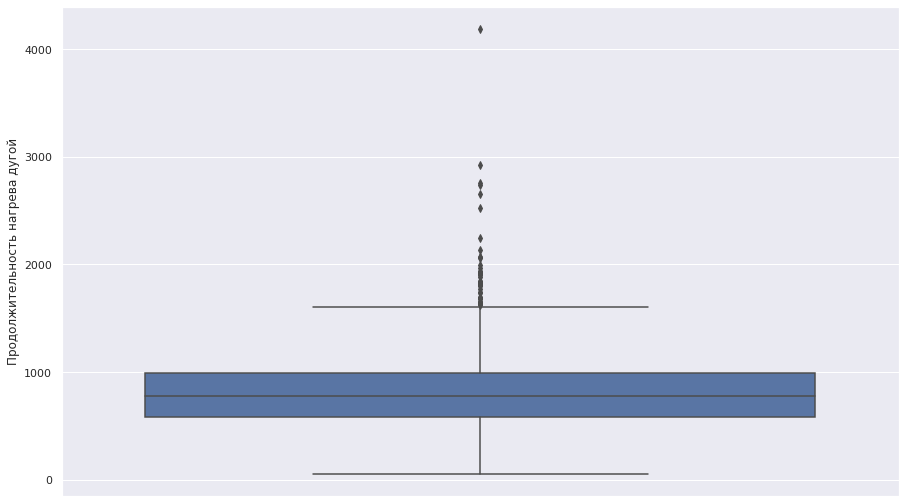


Реактивная мощность



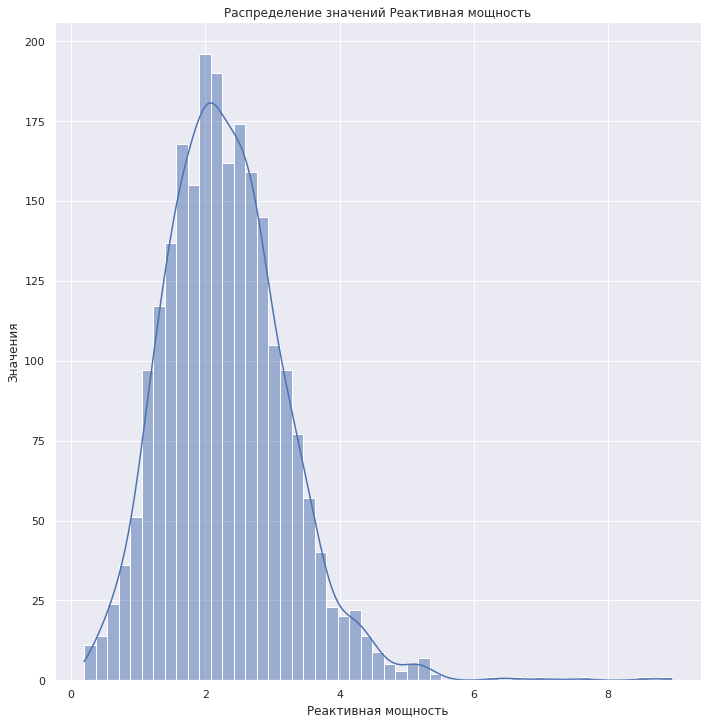

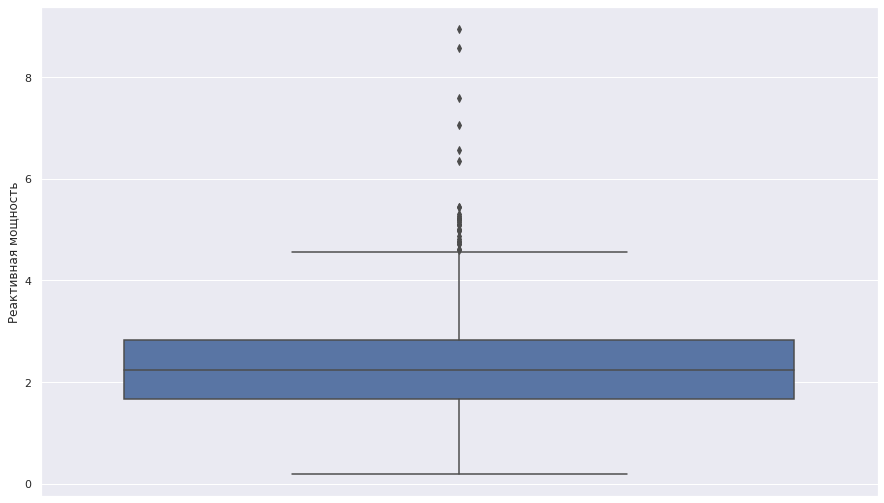


Газ 1



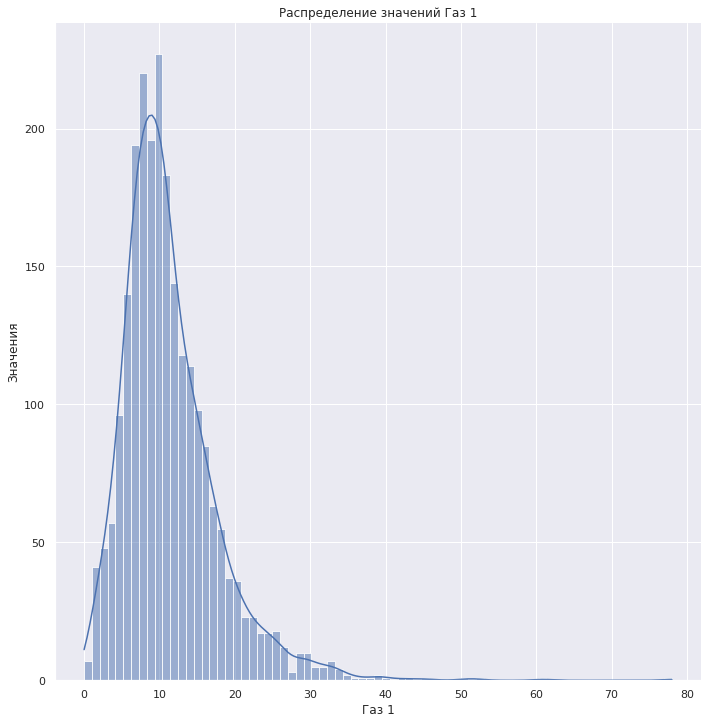

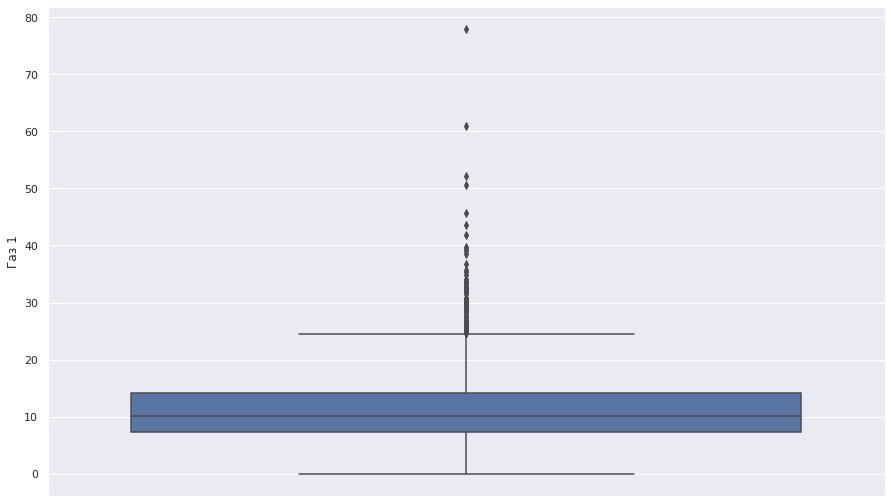


Температура первого замера



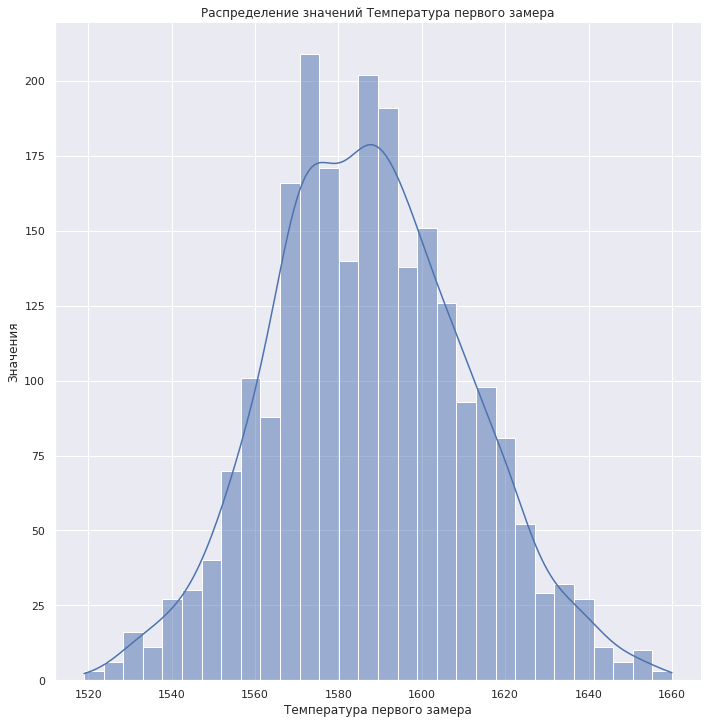

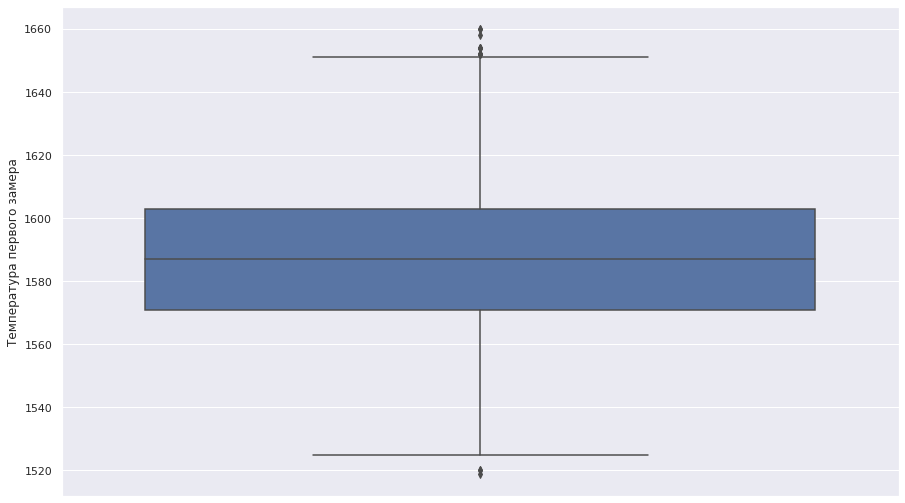


Температура последнего замера



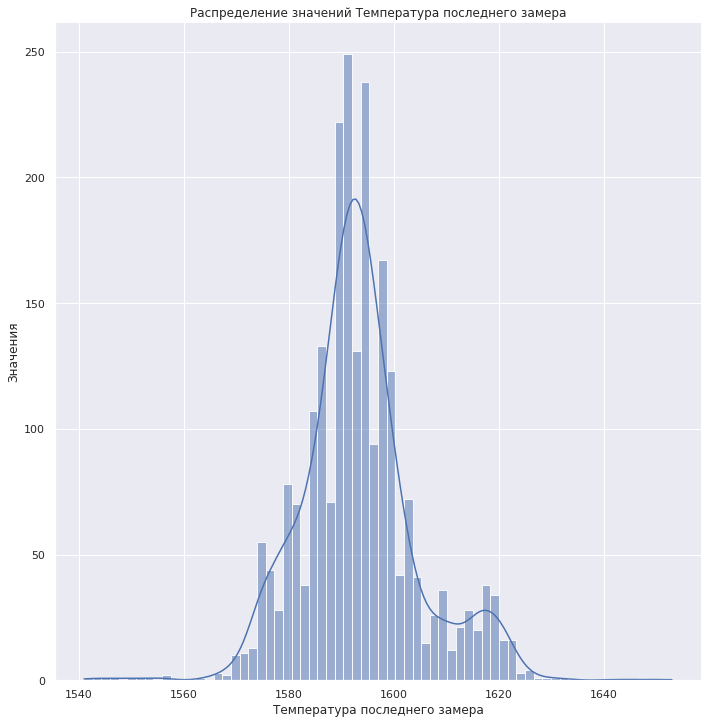

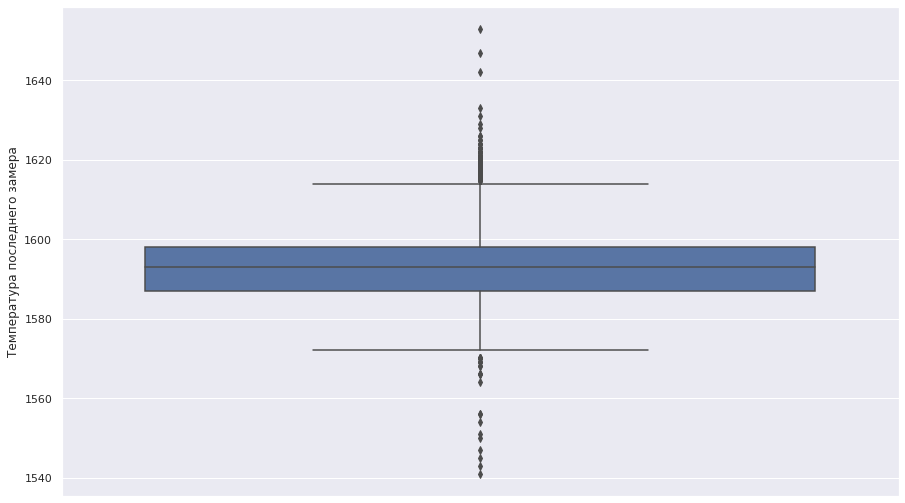


Время между замерами



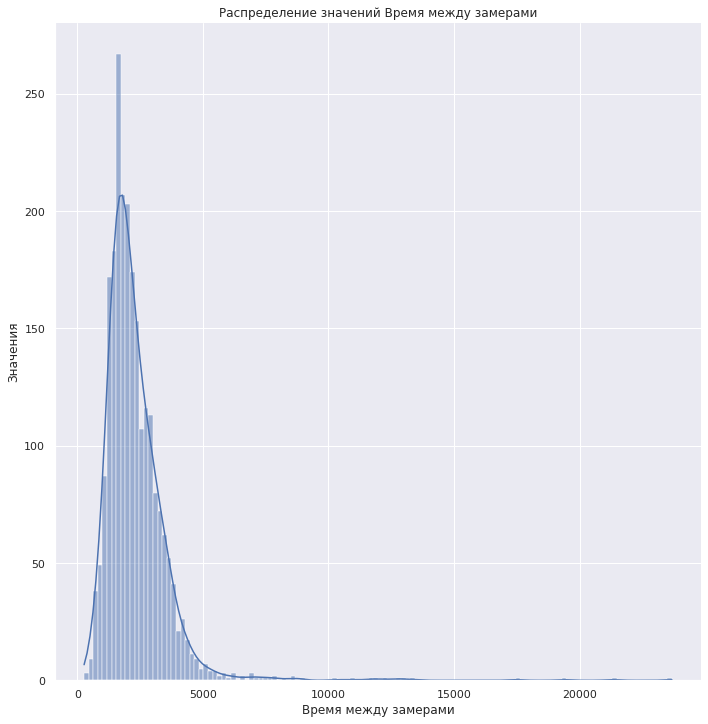

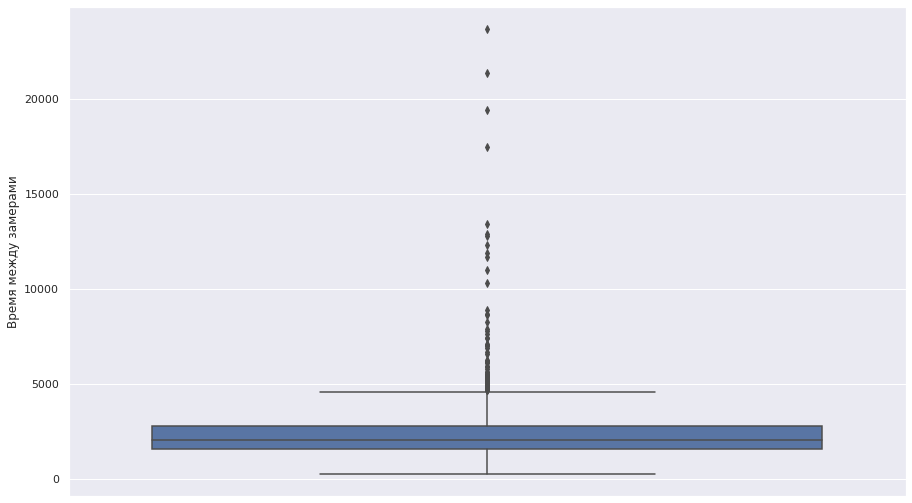


Работа



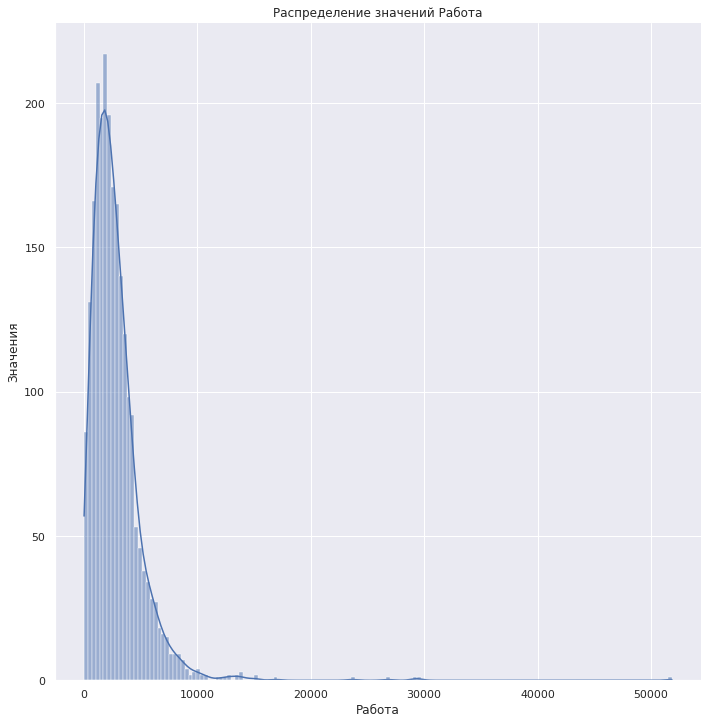

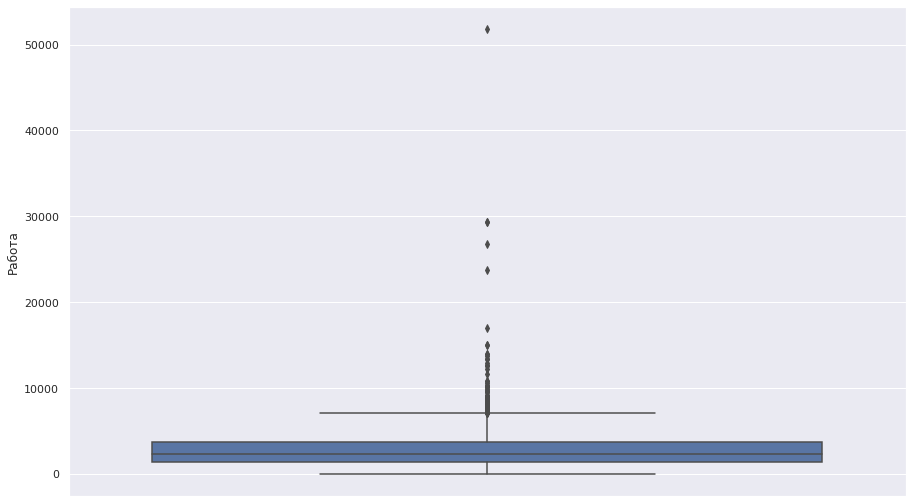


Полная мощность



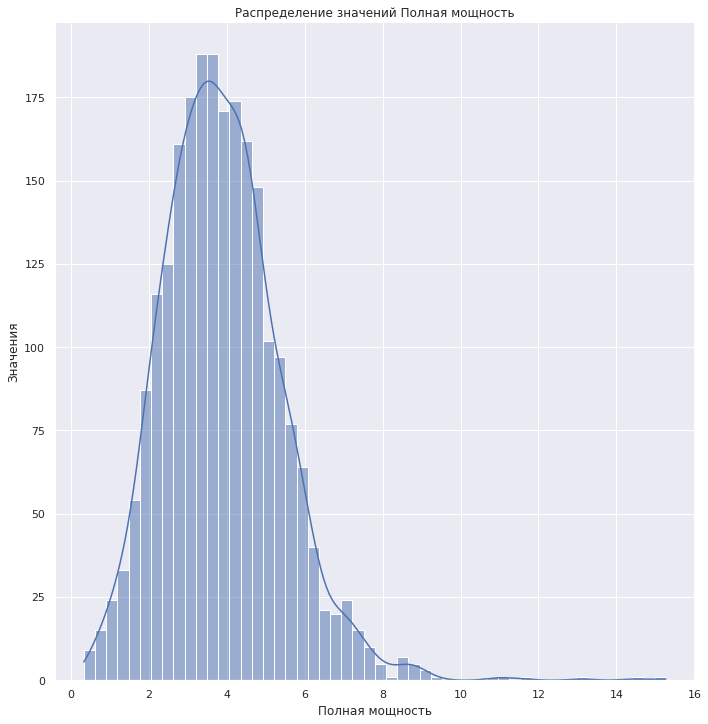

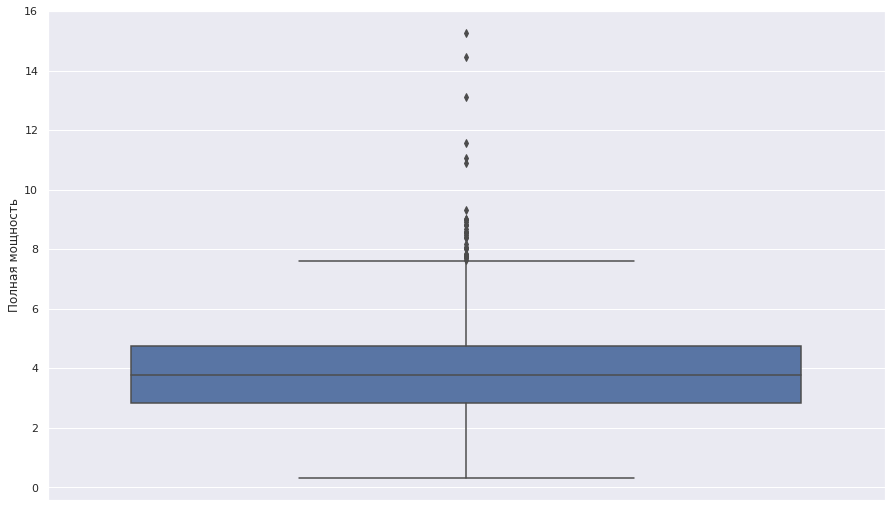

In [27]:
for column in df.columns:
    if 'Bulk' not in column and 'Wire' not in column and 'Bulk' not in column and 'Число' not in column:
        print()
        print(column)
        print()
        sns.displot(df[column], kde=True, height=10)
        plt.ylabel('Значения')
        plt.xlabel(column)
        plt.title(f"Распределение значений {column}")
        plt.show()

        sns.boxplot(data=df, y=column)
        plt.ylabel(column)
        plt.show()

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor

Выделим целивой признак и разделим таблицы на тестовую и тренировочные выборки.

In [28]:
target = df['Температура последнего замера']
features = df.drop('Температура последнего замера', axis = 1)

In [30]:
features_train, features_test, target_train, target_test = train_test_split(
   features, target, test_size=.25, random_state=190623)
features_train.shape

(1746, 31)

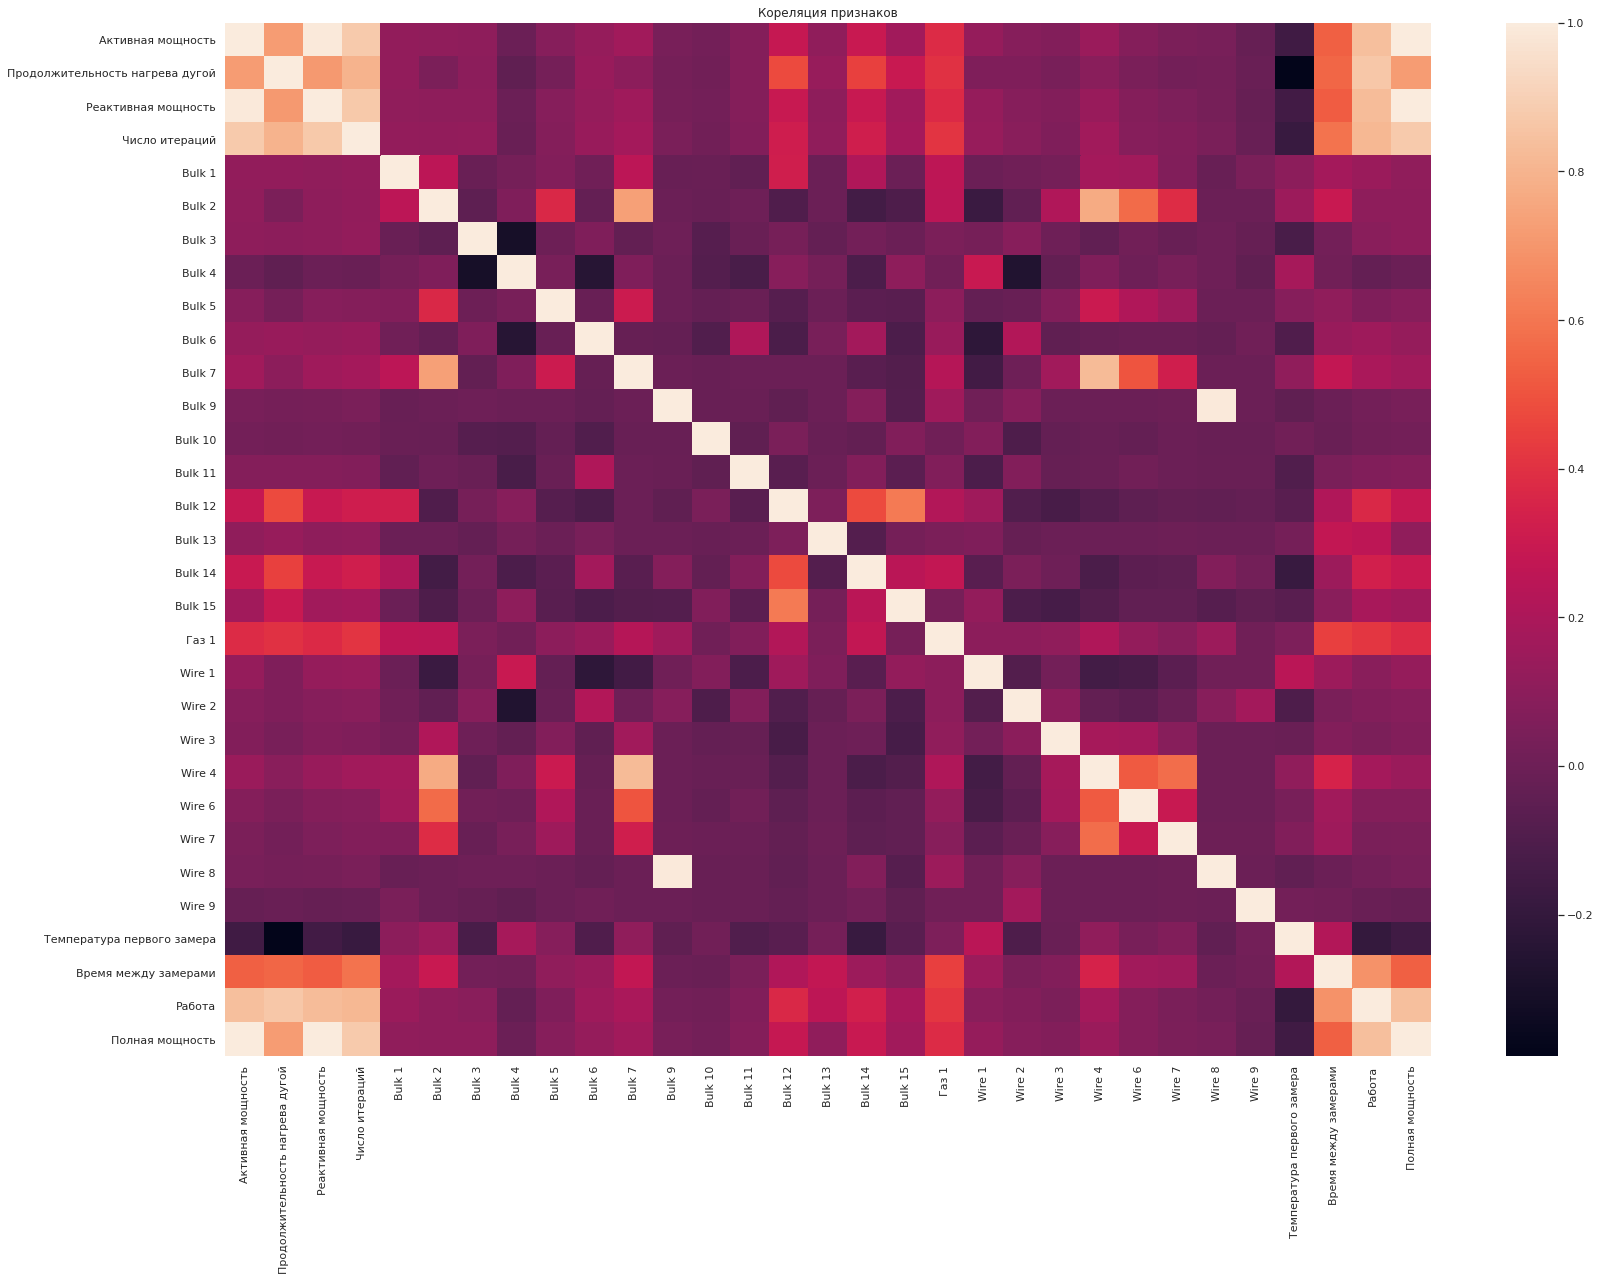

In [31]:
plt.subplots(figsize=(27, 19))
sns.heatmap(features_train.corr())
plt.title('Кореляция признаков')
plt.show()

Как видно из heatmap в выборке коррелируют признаки мощностей, работы, продолжительности нагрева и числа интераций. А также wire 8 и bulk 9.

Обучим модели и подберем лучшие параметры.

In [32]:
scorer = make_scorer(mean_absolute_error, greater_is_better = False)

In [33]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, features_train.columns)])

In [34]:
%%time

rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LGBMRegressor())])
param_grid = { 
    'regressor__n_estimators': range(60, 70, 10),
    'regressor__max_depth' : range(4,7,1)}

CV = GridSearchCV(rf, param_grid, scoring=scorer, n_jobs=-1,cv =4, verbose = 2)
                  
CV.fit(features_train, target_train)  
print(CV.best_params_)    
print(CV.best_score_)
best_model = CV.best_estimator_

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[CV] END .regressor__max_depth=1, regressor__n_estimators=50; total time=  17.1s
[CV] END .regressor__max_depth=1, regressor__n_estimators=50; total time=  15.4s
[CV] END .regressor__max_depth=1, regressor__n_estimators=50; total time=  15.5s
[CV] END .regressor__max_depth=1, regressor__n_estimators=50; total time=  16.9s
[CV] END .regressor__max_depth=1, regressor__n_estimators=60; total time=  20.0s
[CV] END .regressor__max_depth=1, regressor__n_estimators=60; total time=  18.4s
[CV] END .regressor__max_depth=1, regressor__n_estimators=60; total time=  18.6s
[CV] END .regressor__max_depth=1, regressor__n_estimators=60; total time=  18.5s
[CV] END .regressor__max_depth=1, regressor__n_estimators=70; total time=  21.2s
[CV] END .regressor__max_depth=1, regressor__n_estimators=70; total time=  21.0s
[CV] END .regressor__max_depth=1, regressor__n_estimators=70; total time=  22.9s
[CV] END .regressor__max_depth=1, regressor__n_

In [ ]:
%%time

rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(random_state=190623))])
param_grid = { 
    'regressor__n_estimators': range(30, 151, 30),
    'regressor__max_depth' : range(10,51,3)}

CV = GridSearchCV(rf, param_grid, scoring=scorer, n_jobs=-1,cv =4, verbose = 2)
                  
CV.fit(features_train, target_train)  
print(CV.best_params_)    
print(CV.best_score_)
best_model_rfr = CV.best_estimator_

In [ ]:
%%time

rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', XGBRegressor())])
param_grid = { 
    'regressor__n_estimators': range(30, 51, 10),
    'regressor__max_depth' : range(4,11,1)}

CV = GridSearchCV(rf, param_grid, scoring=scorer, n_jobs=-1,cv =4, verbose = 2)
                  
CV.fit(features_train, target_train)  
print(CV.best_params_)    
print(CV.best_score_)
best_model_xgb = CV.best_estimator_

Проверим лучшую модель на тестовой выборке, а также на вменяемость.

In [35]:
best_model.fit(features_train, target_train)

predicted = best_model.predict(features_test)
print('оценка MAE:', mean_absolute_error(target_test, predicted))
print('оценка r2:', r2_score(target_test, predicted))

оценка MAE: 6.090563731477122
оценка r2: 0.4685232484435081


In [42]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
dummy =dummy_regr.predict(features_test)
print('MAE dummy = ',  mean_absolute_error(target_test, dummy))
print('оценка r2:', r2_score(target_test, dummy))

MAE dummy =  8.325161488409435
оценка r2: -6.551412728139638e-05


## Итоговый отчет

### Cравнение решения и плана

Все пункты плана выполнены в полном объеме. Выделение из фрейма целеыого признака, осуществлена после предоработки данных, так как в ходе предаработки удалялись объекты и выделение признаков до завершении предоработки оказалось нецелесообразным.

### Решение трудностей в ходе проекта

Необходимые данные содержались в 7 разных таблицах, решено при помощи их объединения concat.
Данные содержали пропуски и аномалии - удалены в ходе предоработки.
Таблицы data_arc и data_temp содержали несколько объектов с одинаковым номером партии - решено при помощи агрегирования через сводную таблицу: в data_arc примена агрегирующая ф-я sum, а в data_temp выделен признак первого замера температуры как обучающий и последнего как целевой.


### Ключевые шаги решения 

ключевых шагов решения нет

### Признаки обучения Итоговой модели 
Из 31 признака, использованого для обучения модели только 22 оказывали на нее влияние. Наибольшее - температура первого замера и продолжительность нагрева дугой. Температура первого замера была выделена нами фходе агрегирования фрейма data_temp, были исключены партии с номером выше 2499, т.к. отсутствовала полная информация о замерах температуры в них,а так же температура ниже 1500 градусов как аномальная для данного процесса. Признак продолжительность нагрева дугой был создан нами путем приведения признаков фрейма data_arc, отвечающих за время начала и конца нагрева дугой, к типу данных datetime и вычислению разницы между ними, данный признак был агрегирован по номерам партий. Похожим образом выделен признак времени между замерами: вычеслялась разница между первым замером температуры и последним из таблицы data_temp. Номерные признаки Wire и Bulk были отчищены от пропусков путем замены их на нули. Признаки Wire 5 и Bulk 8 были удалены так как содержали по единственному ненулевому значению. Признак газ 1 из фрейма data_gas оставлен без изменений. Признаки активная и реактивная мощность агрегированы по признаку key, так же из этих признаков выделены признаки полной мощности, путем вычесления квадратного корня из суммы квадратов данных признаков, признак "работа" путем умнажения активной мощности на время нагрева дуги. Из признака реактивной мощности удалено аномальное отрицательное значение. При агрегировании признаков во фрейме data_arc выделен признак - число итераций, путем подсчета числа объектов по каждой партии.

### Описание Итоговой модели 
В ходе обучения различных моделей с использованием кросс-валидации была выбрана модель, обученная при помощи LGBMRegressor с максимальной глубиной древа решений = 6 и числом итераций = 70. Данная модель показала лучшие результаты (5.9 показатель MAE на тренировочной выборке) и была проверена на тестовой выборке (MAE = 6.1).